In [36]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib
plt.rcParams.update({
    "font.family": "serif",
})
matplotlib.rcParams['text.usetex'] = True

In [11]:
# Cargar el archivo CSV
file = "dataframes/distances_graph_E=-0,18.csv"
df = pd.read_csv(file)

In [63]:
# Inicializar un grafo no dirigido
G_i = nx.Graph()

# Agregar aristas al grafo con pesos correspondientes a `diff`
for _, row in df.iterrows():
    node1, node2 = map(int, row["link"].split("-"))
    G_i.add_edge(node1, node2, weight=row["d_i"]*0.1)


In [64]:
# Inicializar un grafo no dirigido
G_f = nx.Graph()

# Agregar aristas al grafo con pesos correspondientes a `diff`
for _, row in df.iterrows():
    node1, node2 = map(int, row["link"].split("-"))
    G_f.add_edge(node1, node2, weight=row["d_f"])


In [53]:
G_i.nodes, G_f.nodes

(NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10)),
 NodeView((1, 2, 3, 4, 5, 6, 7, 8, 9, 10)))

In [66]:
for n in G_i.nodes:
    avg_diff = df[df.link.str.contains(f"{n}") &  ~df.link.str.contains(f"{n}0")]["diff"].mean()
    G_i.nodes[n]["size"] = avg_diff
    G_f.nodes[n]["size"] = avg_diff

# NODES SIZED BY DIFF

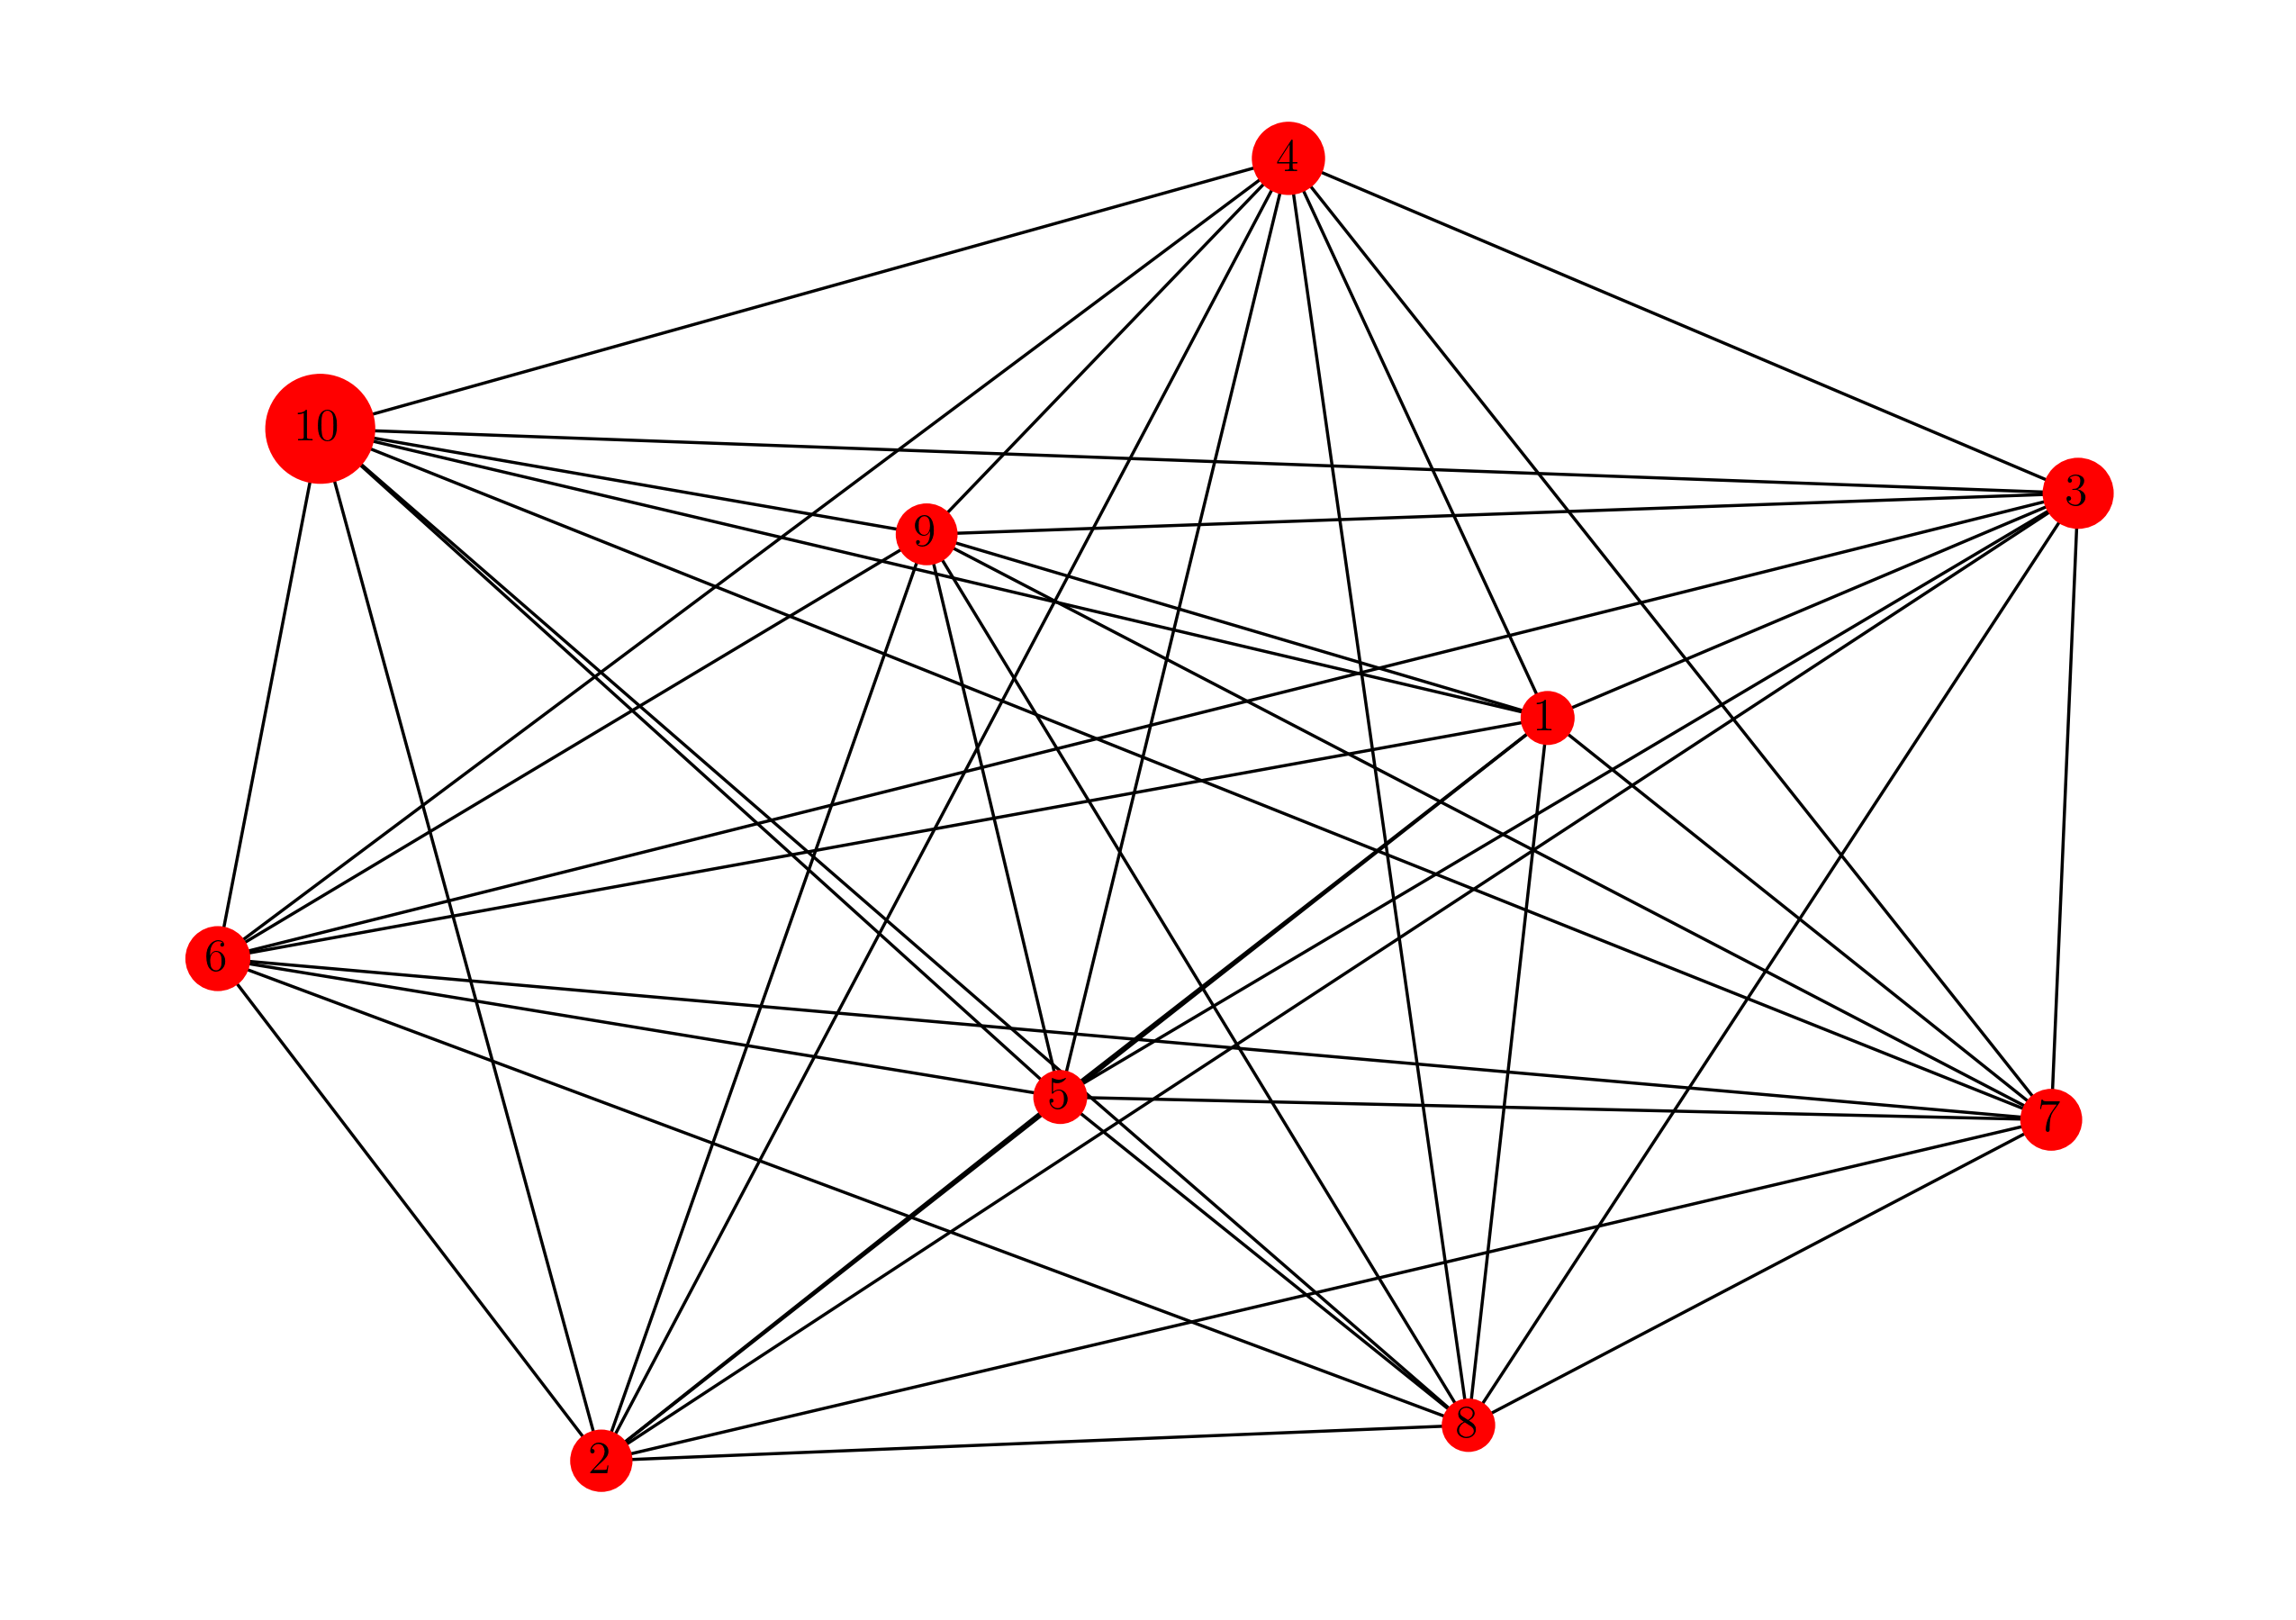

In [38]:
# Obtener los tamaños de los nodos desde el atributo 'size'
node_sizes = [G_i.nodes[n]['size']*1000 for n in G_i.nodes]
plt.figure(figsize=(10, 7), dpi=250)
nx.draw(
    G_i,
    with_labels=True,
    node_size=node_sizes,  # Usar los tamaños extraídos
    node_color="red",
    edge_color="black",
    font_size=15
)

plt.show()

# NODE DISTANCE FIXED BY DISTANCES

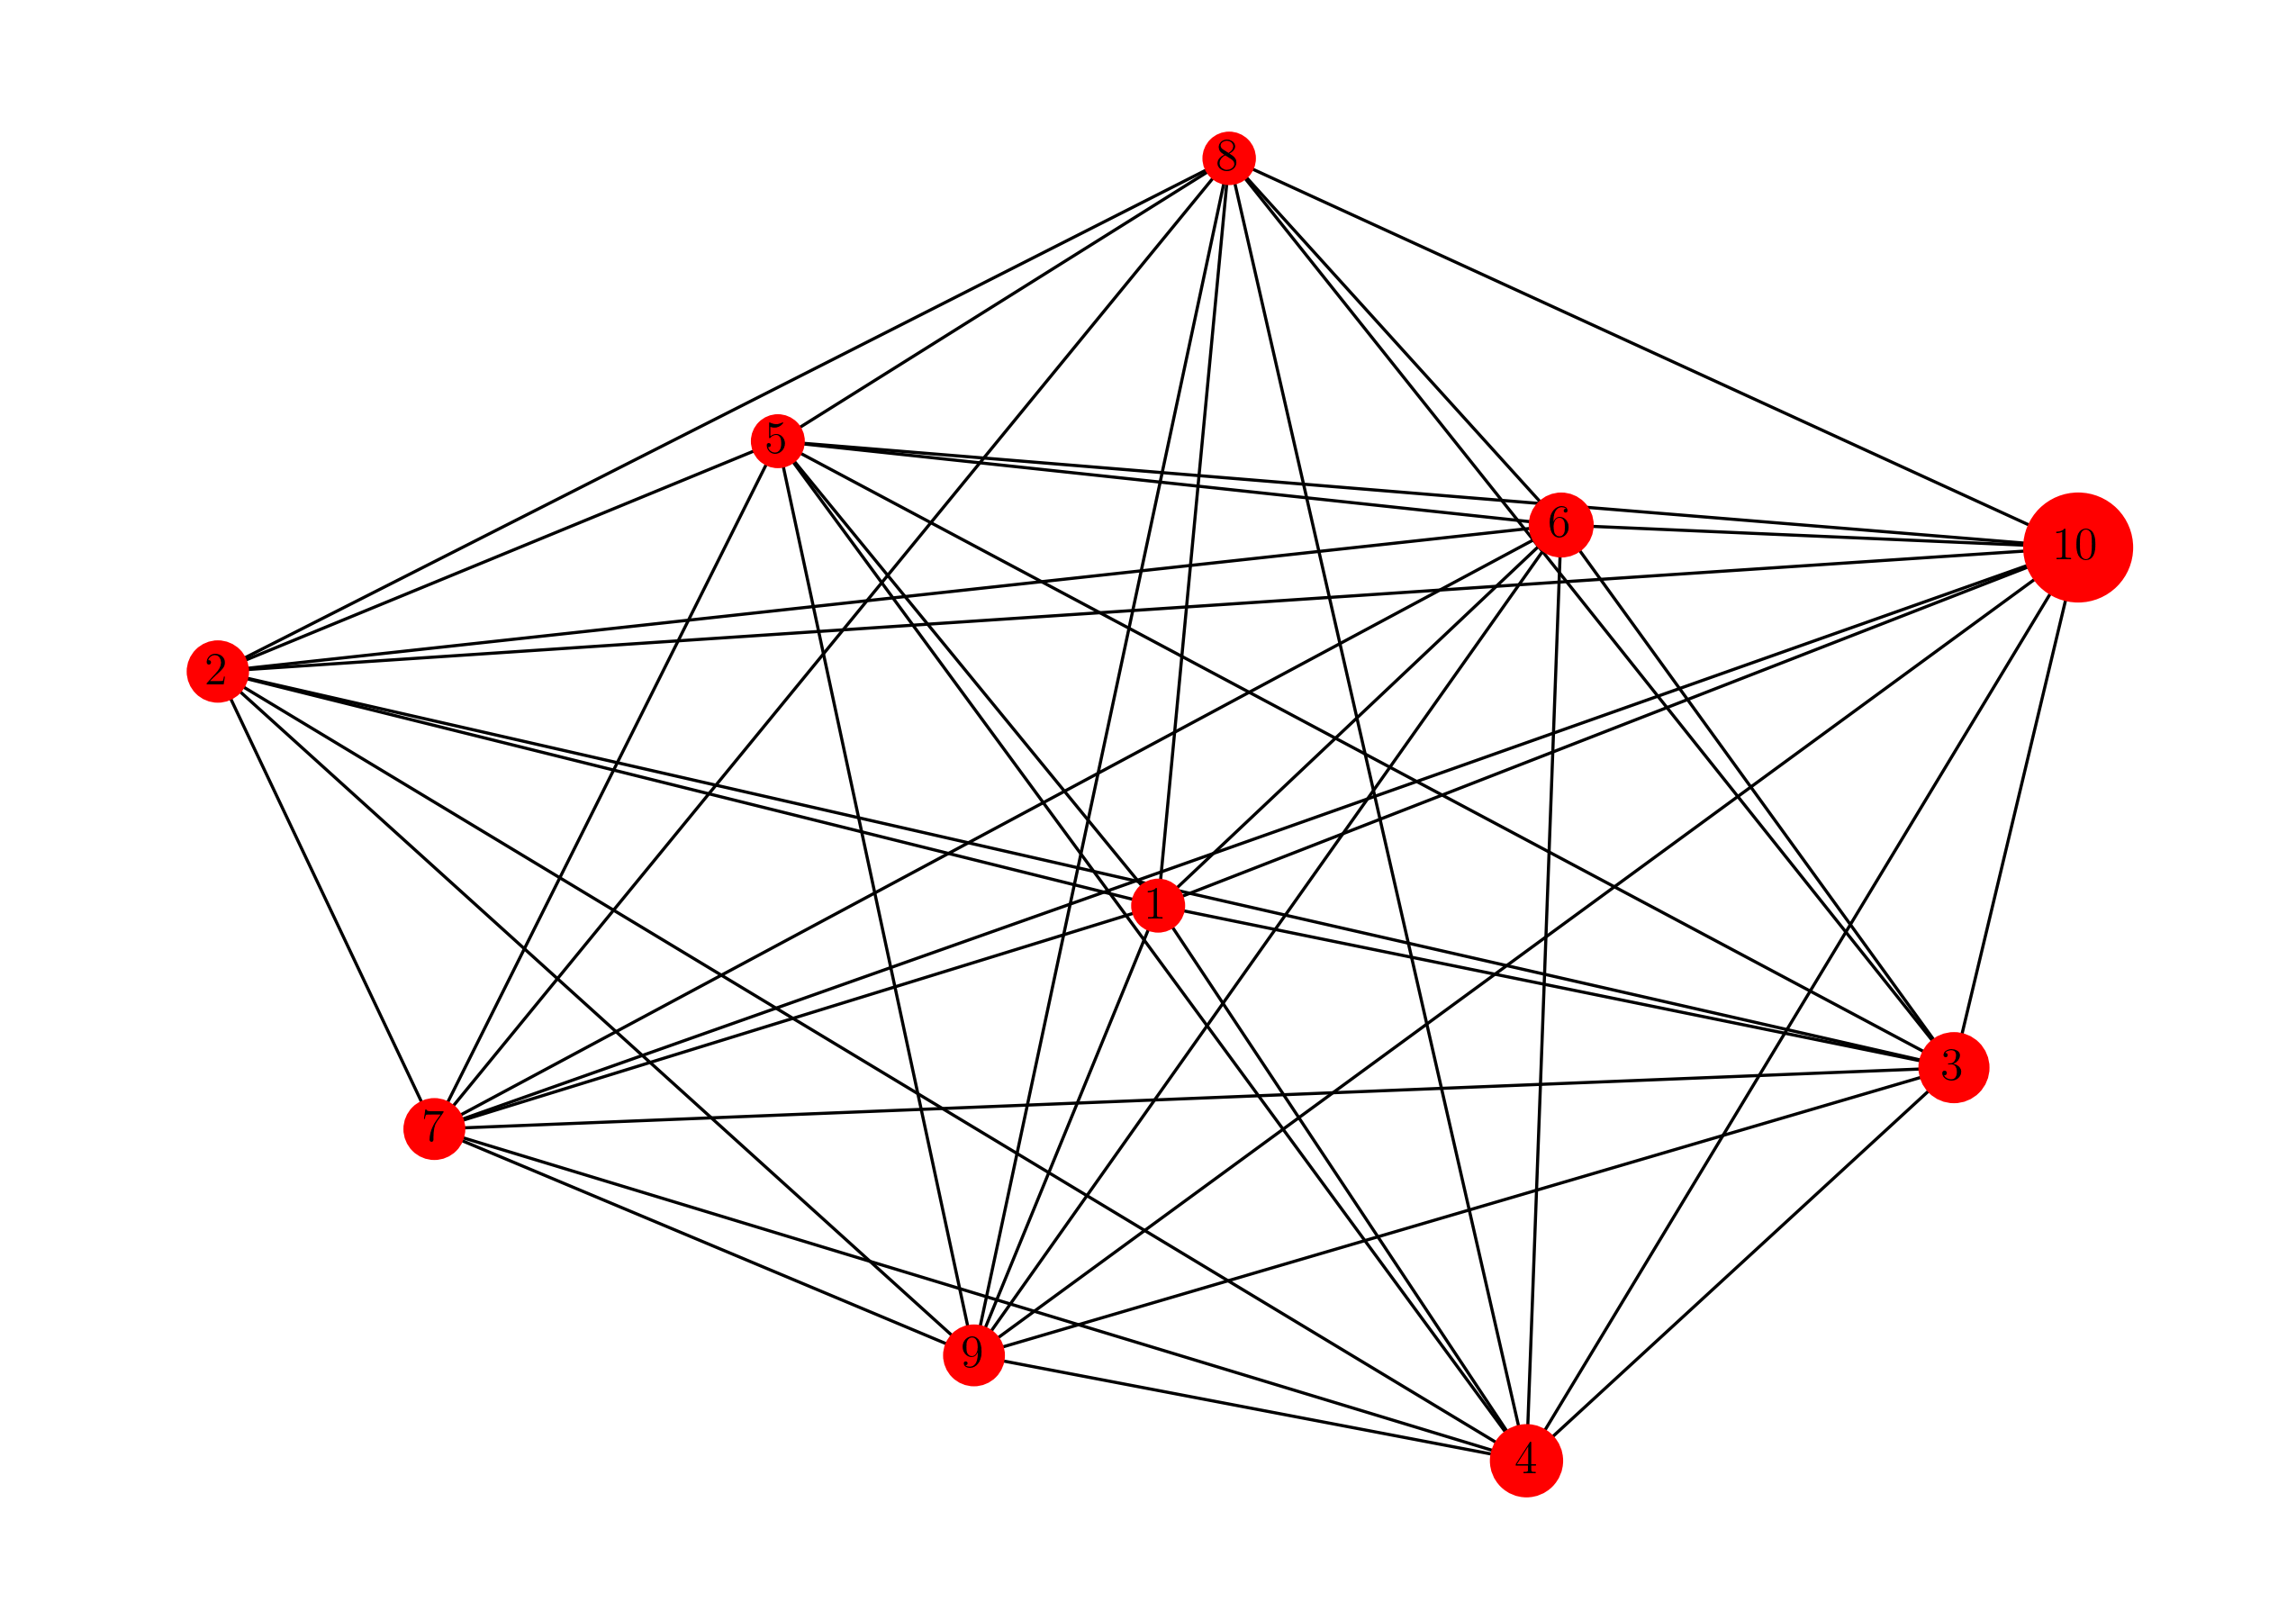

In [40]:
# Obtener los tamaños de los nodos desde el atributo 'size'
node_sizes = [G_i.nodes[n]['size']*1000 for n in G_i.nodes]
pos = nx.spring_layout(G_i, weight='weight')

plt.figure(figsize=(10, 7), dpi=250)
nx.draw(
    G_i,
    pos,
    with_labels=True,
    node_size=node_sizes,  # Usar los tamaños extraídos
    node_color="red",
    edge_color="black",
    font_size=15
)

edge_labels = nx.get_edge_attributes(G_i, 'weight')
#nx.draw_networkx_edge_labels(G_i, pos, edge_labels=edge_labels)


plt.show()

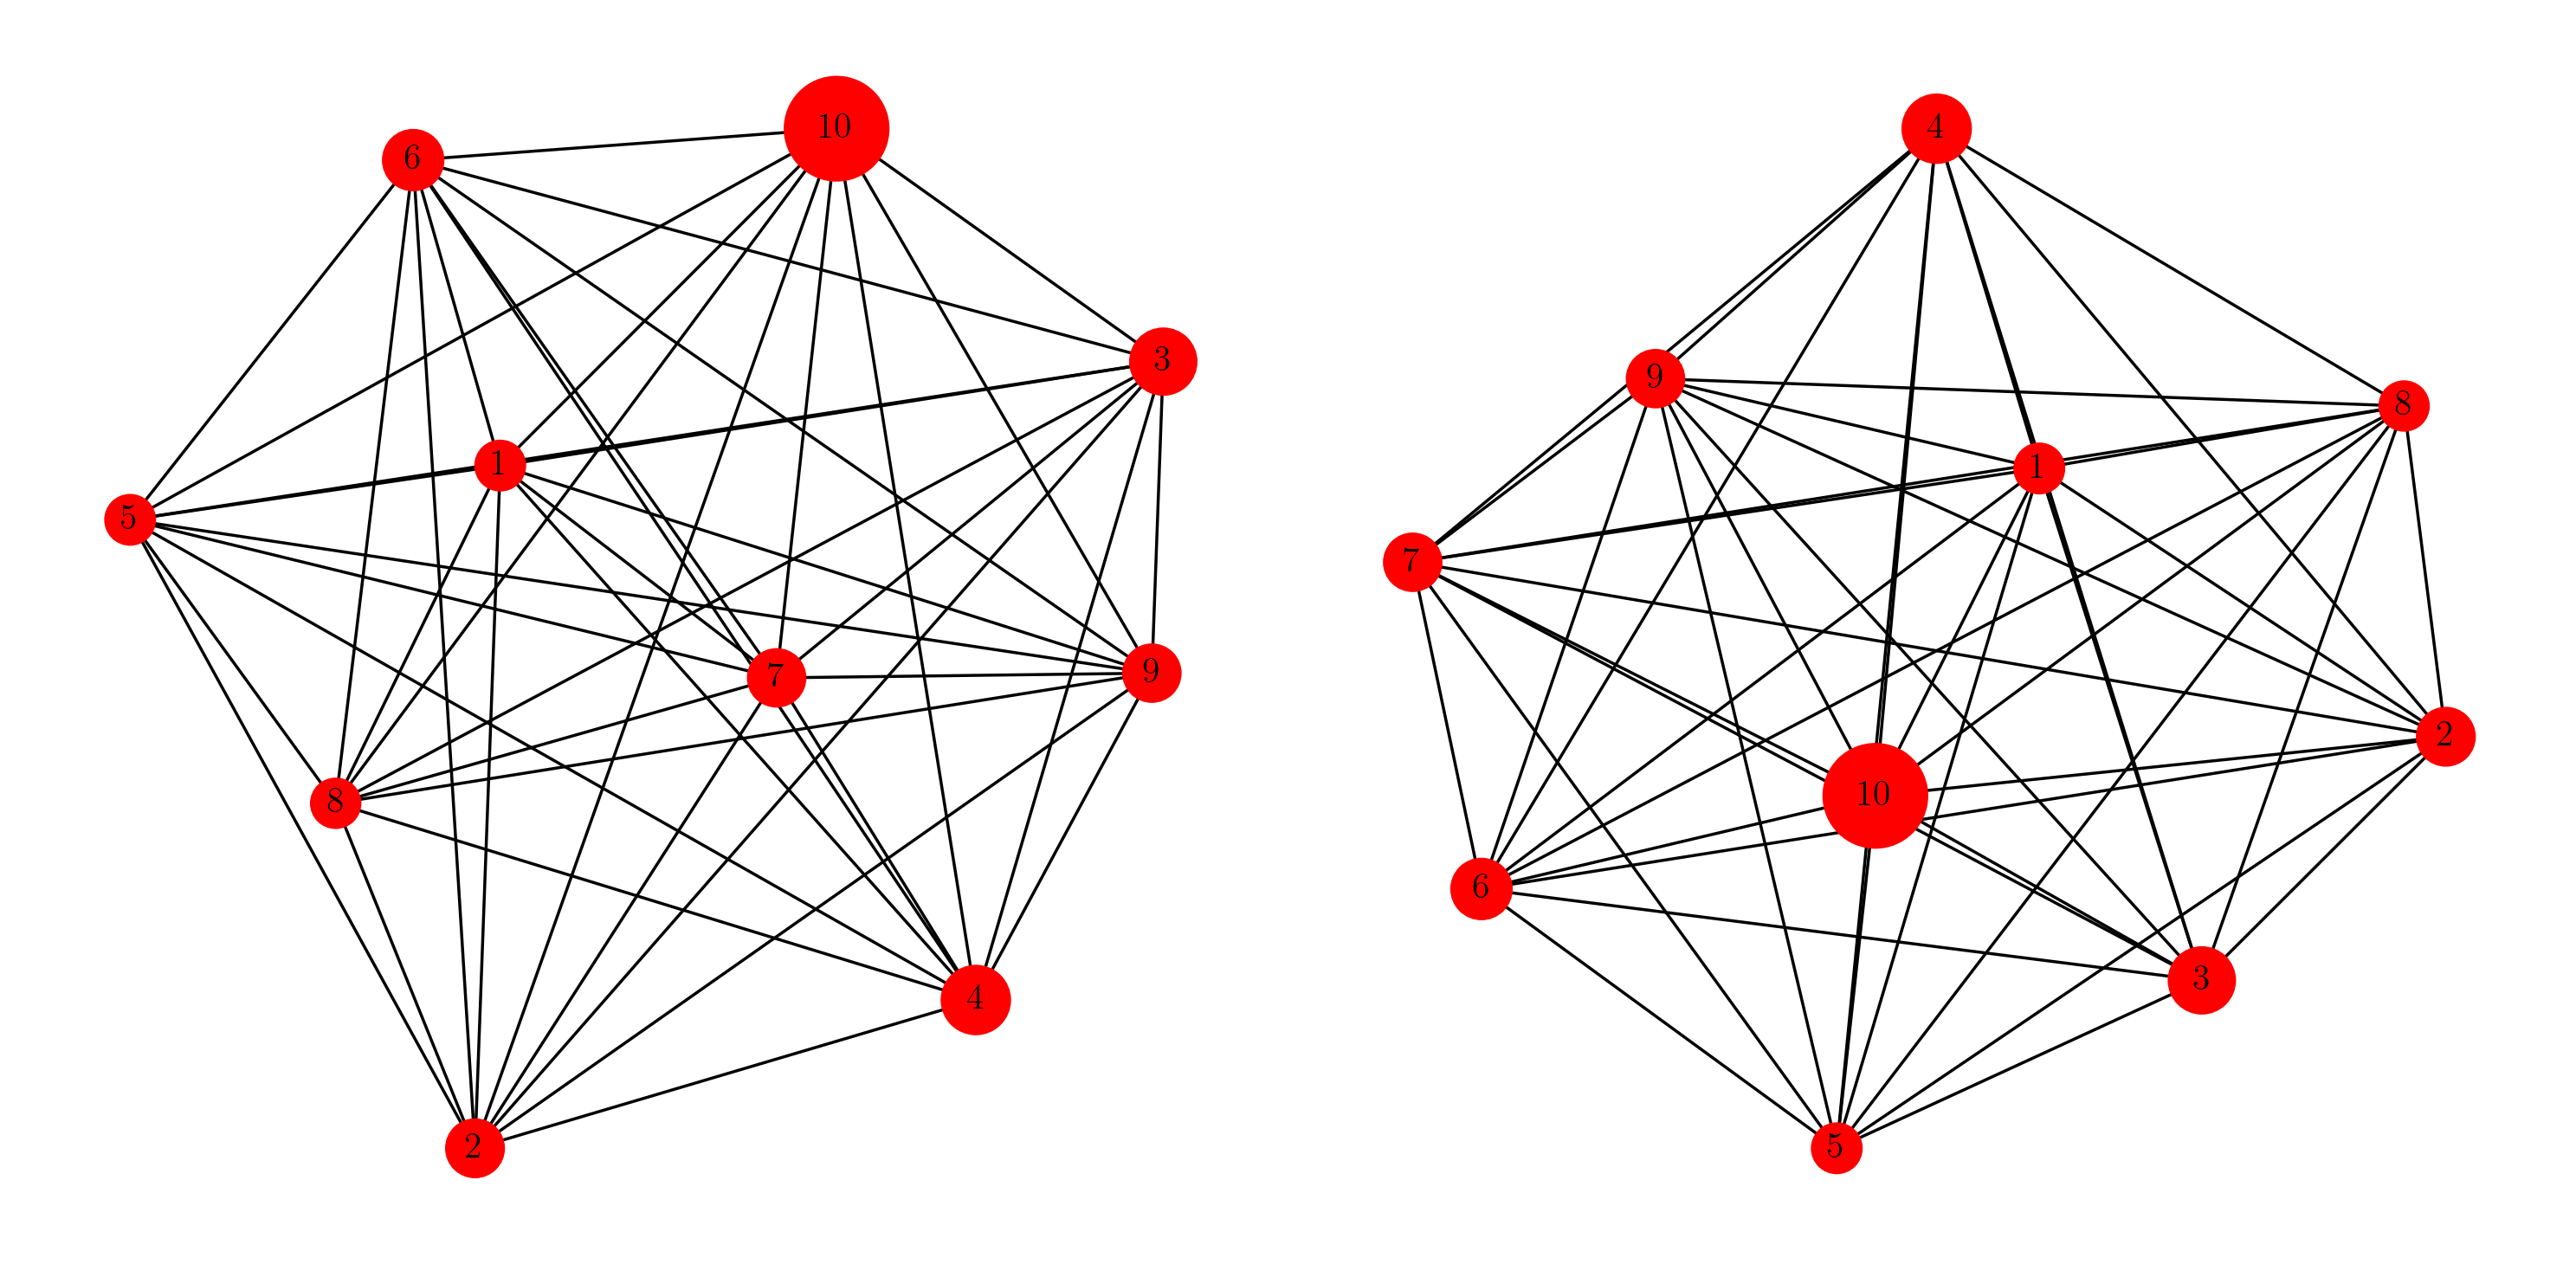

In [67]:
node_sizes_i = [G_i.nodes[n]['size']*1000 for n in G_i.nodes]
node_sizes_f = [G_f.nodes[n]['size']*1000 for n in G_f.nodes]
# Crear posiciones para cada grafo
pos_i = nx.spring_layout(G_i)  # Posiciones para G_i
pos_f = nx.spring_layout(G_f)  # Posiciones para G_f

# Configurar los subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), dpi=250)  # 1 fila, 2 columnas

# Subplot para G_i
nx.draw(
    G_i,
    pos_i,
    with_labels=True,
    node_size=node_sizes_i,
    node_color="red",
    edge_color="black",
    ax=axes[0]  # Graficar en el primer subplot
)
#axes[0].set_title("Grafo G_i")

# Subplot para G_f
nx.draw(
    G_f,
    pos_f,
    with_labels=True,
    node_size=node_sizes_f,
    node_color="red",
    edge_color="black",
    ax=axes[1]  # Graficar en el segundo subplot
)

# Mostrar la figura
plt.tight_layout()
plt.show()

In [59]:
df.d_i.mean(), df.d_f.mean()

(2.8097111111111115, 3.0877111111111106)

In [62]:
df["diff"].mean()

0.4476444444444445

In [ ]:
df

,link,d_i,d_f,diff,perc
0,1-2,2.044,2.089,0.045,2.06
1,1-3,2.573,2.548,0.025,-1.14
2,1-4,4.131,4.656,0.525,24.03
3,1-5,4.659,4.991,0.332,15.19
4,1-6,1.639,1.809,0.170,7.78
5,1-7,3.068,3.309,0.241,11.03
6,1-8,4.139,4.622,0.483,22.11
7,1-9,4.828,5.123,0.295,13.50
8,1-10,3.482,2.423,1.059,-48.47
9,2-3,0.537,0.520,0.017,-0.78


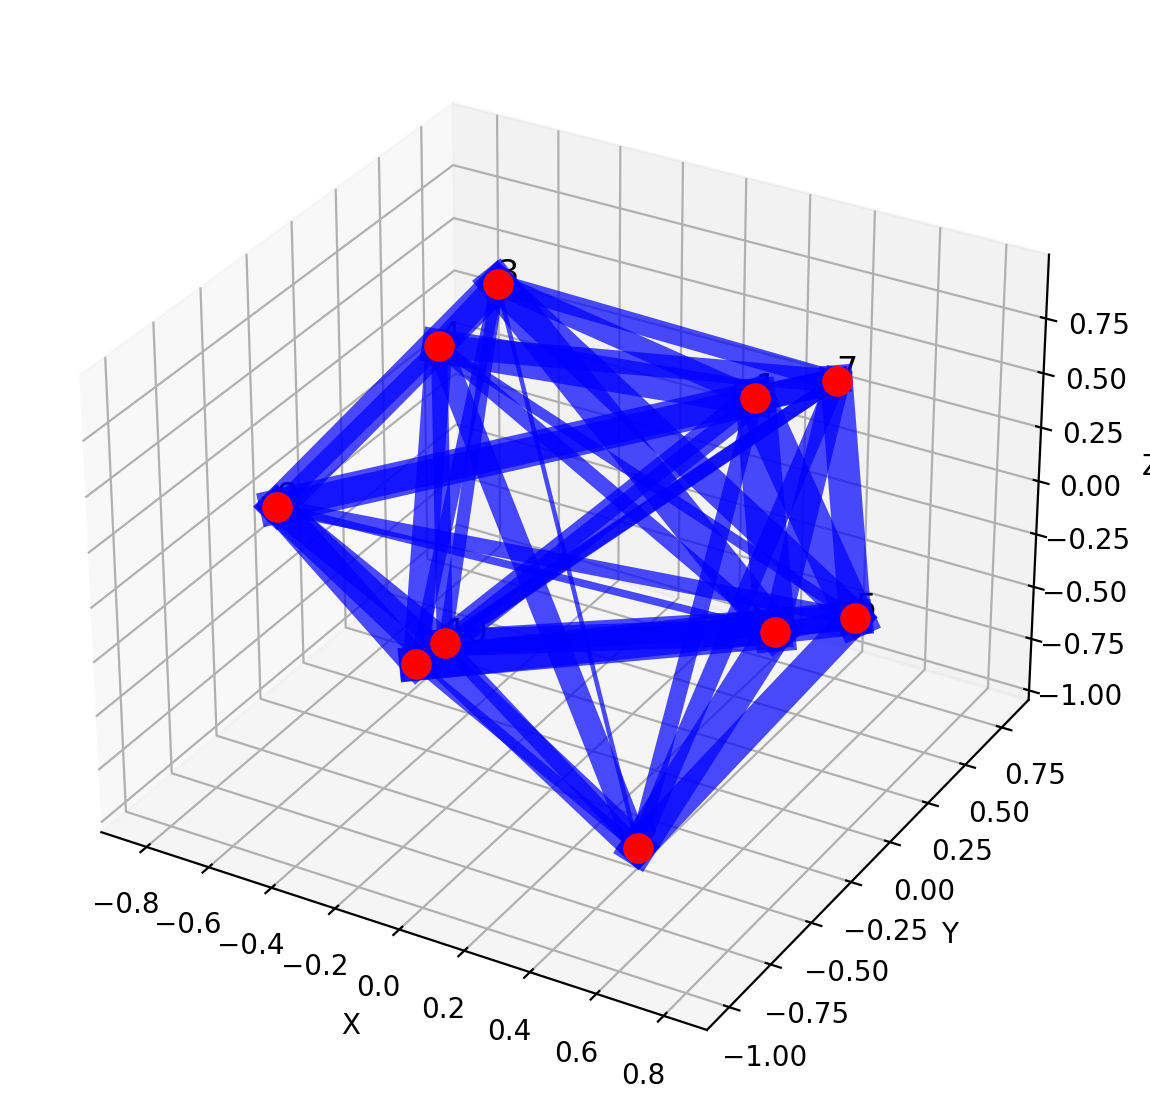

In [7]:
# Configurar la visualización 3D
fig = plt.figure(figsize=(10, 7), dpi=200)
ax = fig.add_subplot(111, projection="3d")

# Generar posiciones en 3D para los nodos
pos_3d = nx.spring_layout(G, dim=3, seed=42)

# Dibujar nodos y aristas en 3D
for edge in G.edges(data=True):
    x = [pos_3d[edge[0]][0], pos_3d[edge[1]][0]]
    y = [pos_3d[edge[0]][1], pos_3d[edge[1]][1]]
    z = [pos_3d[edge[0]][2], pos_3d[edge[1]][2]]
    ax.plot(x, y, z, color="b", alpha=0.7, lw=edge[2]["weight"] * 3)

# Dibujar nodos y etiquetas
for node, (x, y, z) in pos_3d.items():
    ax.scatter(x, y, z, color="r", s=100)
    ax.text(x, y, z, f'{node}', size=12, zorder=1, color='k') 

# Configurar etiquetas y título del gráfico
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

plt.show()